In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('HR_Dataset.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


- **Numerical columns**: satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years

- **Categorical columns**:  Departments, salary

- **Target column**: left

In [3]:
X = df.drop('left', axis=1)

In [4]:
y=df['left']

In [7]:
X.shape

(14999, 9)

In [9]:
y.shape

(14999,)

In [10]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [11]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='str')

In [29]:
X['Departments '].unique()

<StringArray>
[      'sales',  'accounting',          'hr',   'technical',     'support',
  'management',          'IT', 'product_mng',   'marketing',       'RandD']
Length: 10, dtype: str

In [15]:
X.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [17]:
y.isnull().sum()

np.int64(0)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [19]:
y_train.value_counts()

left
0    9142
1    2857
Name: count, dtype: int64

In [20]:
y_test.value_counts()

left
0    2286
1     714
Name: count, dtype: int64

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11999, 9), (3000, 9), (11999,), (3000,))

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [25]:
numerical_features = X_train.select_dtypes(exclude='object')
categorical_features = X_train.select_dtypes(include='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_18732\4193431033.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = X_train.select_dtypes(include='object')


In [27]:
numerical_features.columns, categorical_features.columns

(Index(['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years'],
       dtype='str'),
 Index(['Departments ', 'salary'], dtype='str'))

In [36]:
ct = ColumnTransformer(
    transformers=[
        ('OHE', OneHotEncoder(handle_unknown="ignore", drop=None), categorical_features.columns),
    ],
    remainder='passthrough'
)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipe = Pipeline([
    ('preprocess', ct),
    ('model', rf)
])

In [40]:
pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('OHE', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sp

In [47]:
y_pred = pipe.predict(X_test)

In [42]:
pipe.score(X_test, y_test)

0.989

In [43]:
train_accuracy = pipe.score(X_train, y_train)

In [44]:
test_accuracy = pipe.score(X_test, y_test)

In [45]:
train_accuracy, test_accuracy

(1.0, 0.989)

In [46]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, y_pred)

array([[2278,    8],
       [  25,  689]])

In [5]:
import joblib

In [50]:
joblib.dump(pipe, 'my_pipeline.joblib')

['my_pipeline.joblib']

In [6]:
loaded_pipeline = joblib.load('my_pipeline.joblib')

In [7]:
new_input = pd.DataFrame(columns=X.columns)

In [8]:
new_input.loc[0]=[0.18,0.92,6,260,5,0,0,"sales",'low']

In [9]:
new_input

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.18,0.92,6,260,5,0,0,sales,low


In [10]:
new_input.loc[1]=[0.75,0.80,3,180,3,0,0,"technical",'medium']

In [11]:
new_input

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.18,0.92,6,260,5,0,0,sales,low
1,0.75,0.80,3,180,3,0,0,technical,medium


In [12]:
loaded_pipeline.predict(new_input)

array([0, 0])

In [13]:
new_input.loc[2]=[0.85,0.70,4,190,7,0,1,"management",'high']
new_input.loc[3]=[0.40,0.95,5,240,5,0,0,"support",'low']
new_input.loc[4]=[0.62,0.60,2,150,1,0,0,"hr",'medium']

In [14]:
new_input

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.18,0.92,6,260,5,0,0,sales,low
1,0.75,0.80,3,180,3,0,0,technical,medium
2,0.85,0.70,4,190,7,0,1,management,high
3,0.40,0.95,5,240,5,0,0,support,low
4,0.62,0.60,2,150,1,0,0,hr,medium


In [15]:
loaded_pipeline.predict(new_input)

array([0, 0, 0, 0, 0])

In [16]:
new_input.loc[5]=[0.12,0.60,6,260,5,0,0,"hr",'low']

In [17]:
loaded_pipeline.predict(new_input)

array([0, 0, 0, 0, 0, 0])

In [21]:
new_input.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='str')

In [24]:
loaded_pipeline[:-1].get_feature_names_out()

array(['OHE__Departments _IT', 'OHE__Departments _RandD',
       'OHE__Departments _accounting', 'OHE__Departments _hr',
       'OHE__Departments _management', 'OHE__Departments _marketing',
       'OHE__Departments _product_mng', 'OHE__Departments _sales',
       'OHE__Departments _support', 'OHE__Departments _technical',
       'OHE__salary_high', 'OHE__salary_low', 'OHE__salary_medium',
       'remainder__satisfaction_level', 'remainder__last_evaluation',
       'remainder__number_project', 'remainder__average_montly_hours',
       'remainder__time_spend_company', 'remainder__Work_accident',
       'remainder__promotion_last_5years'], dtype=object)

In [25]:
new_input.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='str')

In [26]:
new_input.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Departments                  str
salary                       str
dtype: object

In [33]:
X_test.iloc[0]

satisfaction_level            0.45
last_evaluation               0.54
number_project                   2
average_montly_hours           154
time_spend_company               3
Work_accident                    0
promotion_last_5years            0
Departments              marketing
salary                         low
Name: 1073, dtype: object

In [34]:
y_test.iloc[0]

np.int64(1)

In [36]:
loaded_pipeline.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0], shape=(3000,))

In [37]:
loaded_pipeline.predict_proba(new_input)

array([[0.8 , 0.2 ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.66, 0.34],
       [1.  , 0.  ],
       [0.91, 0.09]])

In [38]:
y_train.value_counts(normalize=True)

left
0    0.761897
1    0.238103
Name: proportion, dtype: float64

In [39]:
new_input.loc[6]=[0.12,0.9,7,300,5,0,0,"sales",'low']

In [40]:
loaded_pipeline.predict(new_input)

array([0, 0, 0, 0, 0, 0, 1])

In [41]:
y_prob = loaded_pipeline.predict_proba(new_input)[:,1]
y_custom = (y_prob > 0.3).astype(int)

In [42]:
y_custom

array([0, 0, 0, 1, 0, 0, 1])

In [24]:
y_pred_prob = loaded_pipeline.predict_proba(X_test)[:,1]

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = loaded_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2278    8]
 [  25  689]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [56]:
import shap

# Extract the trained random forest model from pipeline
rf_model = loaded_pipeline.named_steps['model']

# Transform test data (without classifier)
X_test_transformed = loaded_pipeline[:-1].transform(X_test)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test_transformed)

In [57]:
len(shap_values[2]), shap_values[2]

(20,
 .values =
 array([[ 5.71314450e-04, -5.71314450e-04],
        [ 7.77168465e-04, -7.77168465e-04],
        [ 1.39173665e-03, -1.39173665e-03],
        [ 7.78822593e-04, -7.78822593e-04],
        [ 3.01357506e-04, -3.01357506e-04],
        [ 4.55996116e-04, -4.55996116e-04],
        [ 4.20118662e-03, -4.20118662e-03],
        [ 1.70501420e-04, -1.70501420e-04],
        [ 2.67664922e-03, -2.67664922e-03],
        [ 2.56958856e-03, -2.56958856e-03],
        [-1.60896780e-03,  1.60896780e-03],
        [-8.44259166e-03,  8.44259166e-03],
        [-5.98251620e-04,  5.98251620e-04],
        [ 8.32735661e-02, -8.32735661e-02],
        [ 3.30495602e-02, -3.30495602e-02],
        [ 6.03685972e-02, -6.03685972e-02],
        [ 4.59143287e-02, -4.59143287e-02],
        [ 1.56895117e-02, -1.56895117e-02],
        [-3.53728293e-03,  3.53728293e-03],
        [ 6.20472029e-05, -6.20472029e-05]])
 
 .base_values =
 array([0.76193516, 0.23806484])
 
 .data =
 array([  0.  ,   0.  ,   0.  ,   0.  ,  

In [60]:
shap_values.shape

(3000, 20, 2)

In [65]:
features = shap_values.feature_names

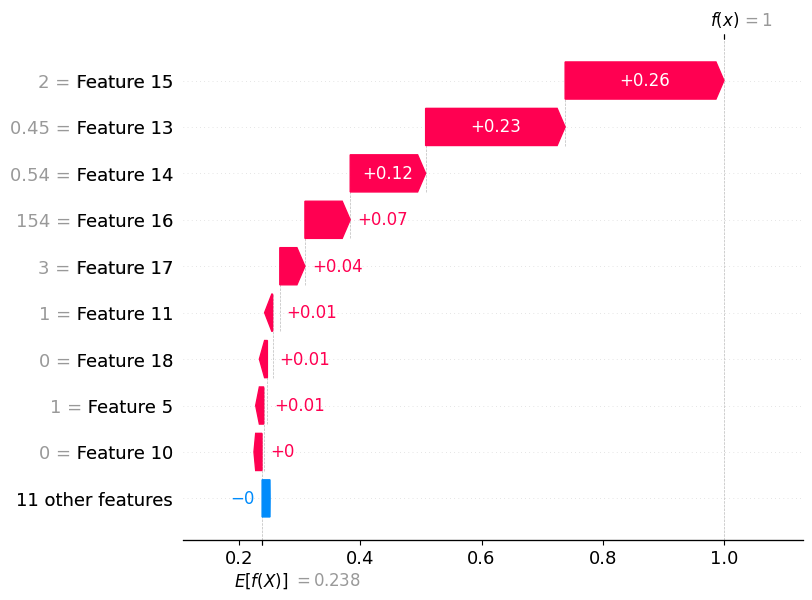

In [61]:
shap.plots.waterfall(shap_values[0,:,1])

In [66]:
features

In [67]:
shap_values[0]

.values =
array([[-5.22246530e-04,  5.22246530e-04],
       [-7.50228566e-04,  7.50228566e-04],
       [-1.36651489e-04,  1.36651489e-04],
       [ 3.55905919e-04, -3.55905919e-04],
       [-2.13170838e-04,  2.13170838e-04],
       [-6.09164577e-03,  6.09164577e-03],
       [-4.19399645e-04,  4.19399645e-04],
       [ 1.65122991e-03, -1.65122991e-03],
       [ 1.68196365e-03, -1.68196365e-03],
       [ 1.32401673e-03, -1.32401673e-03],
       [-2.83395750e-03,  2.83395750e-03],
       [-1.18875516e-02,  1.18875516e-02],
       [-2.09980156e-03,  2.09980156e-03],
       [-2.30136177e-01,  2.30136177e-01],
       [-1.24430047e-01,  1.24430047e-01],
       [-2.62030795e-01,  2.62030795e-01],
       [-7.46889174e-02,  7.46889174e-02],
       [-4.14566254e-02,  4.14566254e-02],
       [-8.60343593e-03,  8.60343593e-03],
       [-6.47625866e-04,  6.47625866e-04]])

.base_values =
array([0.76193516, 0.23806484])

.data =
array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
 

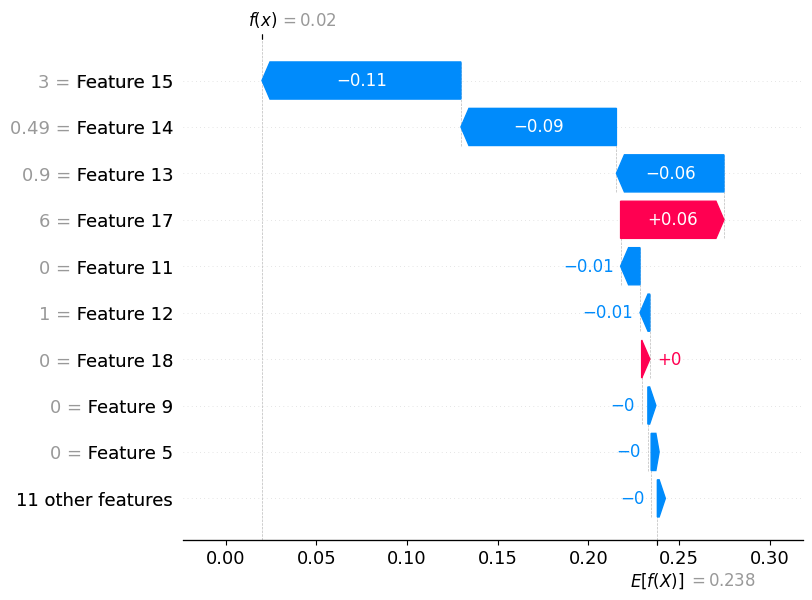

In [68]:
shap.plots.waterfall(shap_values[1,:,1])

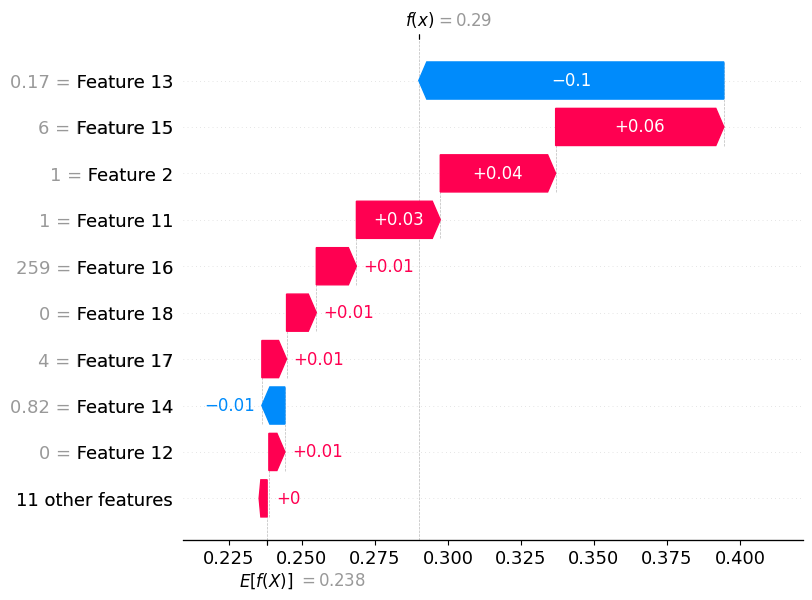

In [74]:
shap.plots.waterfall(shap_values[6,:,1])

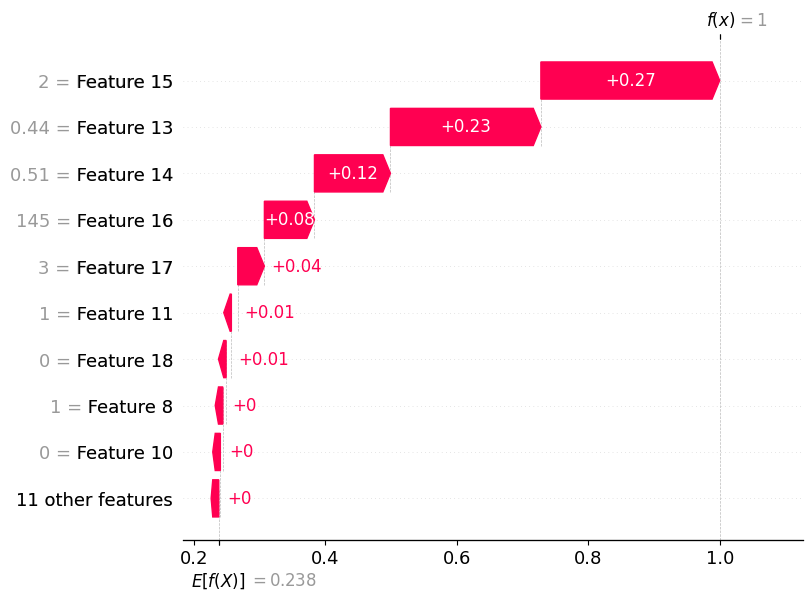

In [79]:
shap.plots.waterfall(shap_values[12,:,1])

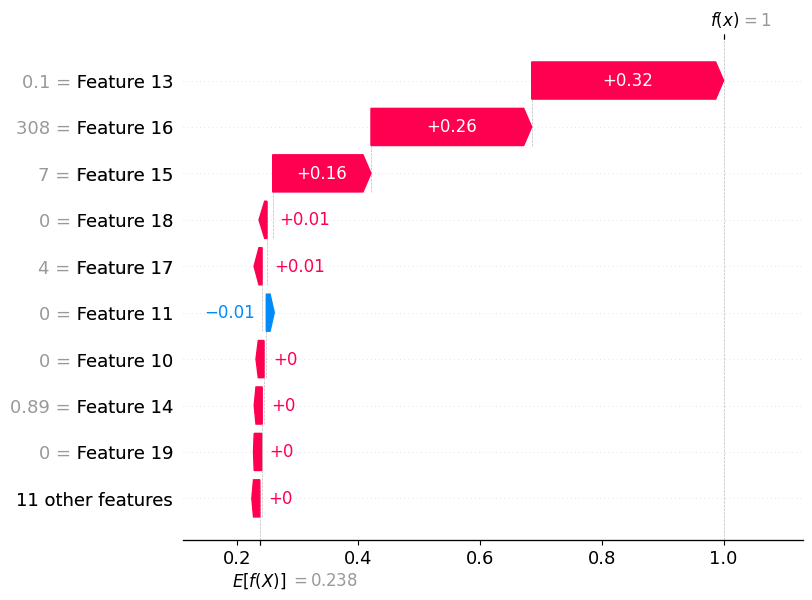

In [84]:
shap.plots.waterfall(shap_values[17,:,1])

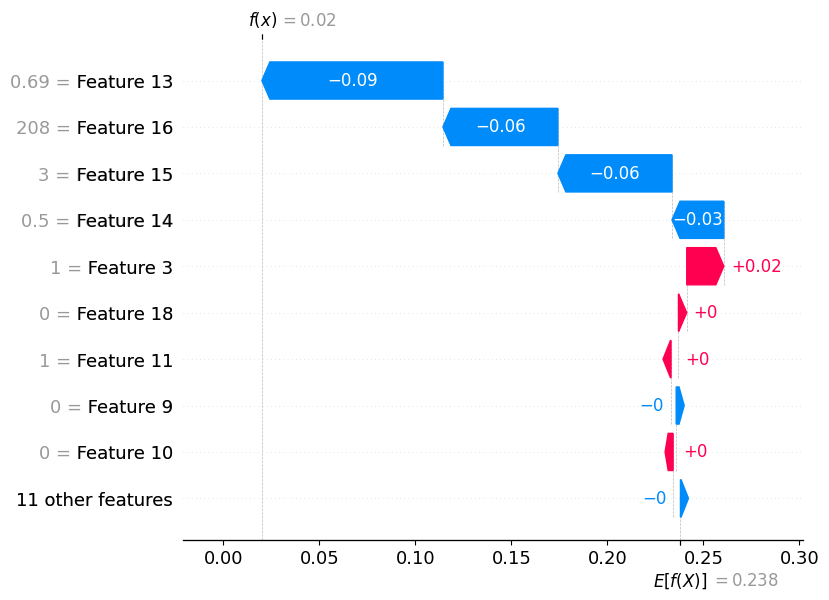

In [86]:
shap.plots.waterfall(shap_values[13,:,1])

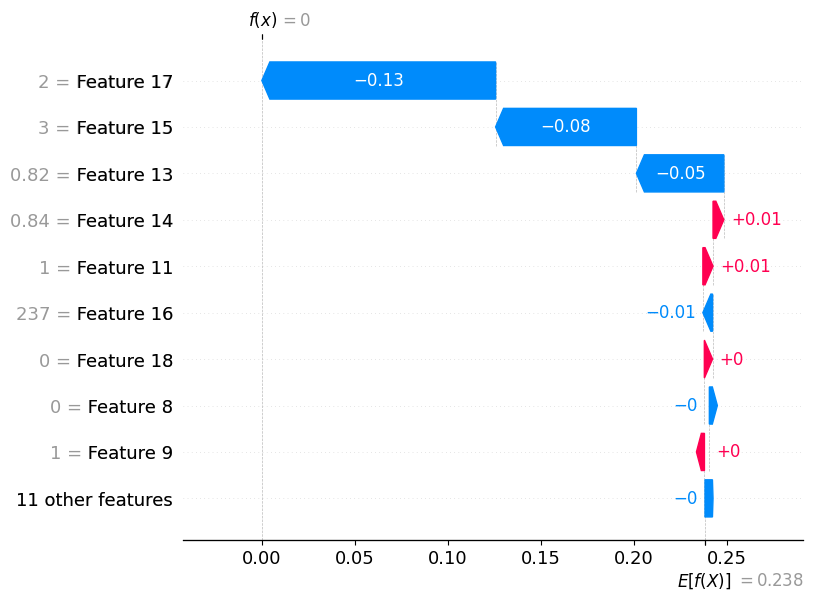

In [87]:
shap.plots.waterfall(shap_values[14,:,1])

In [25]:
import matplotlib.pyplot as plt

(array([2160.,  107.,   23.,    6.,    6.,   10.,   18.,    7.,   35.,
         628.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

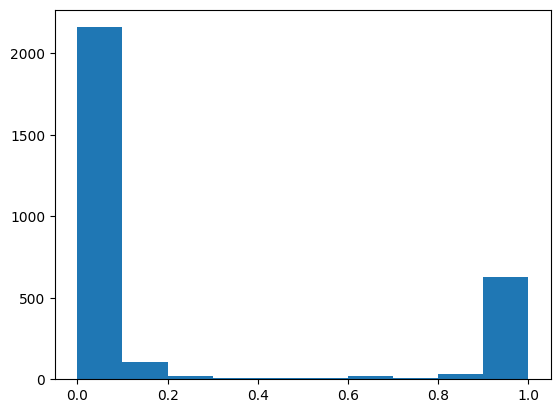

In [26]:
plt.hist(y_pred_prob)